In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Actual csv File. 

In [4]:
df = pd.read_csv("Monthly_Food_Retail_Price.csv")

In [5]:
df

,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,Jan-2001,24.0
1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,Jan-2001,26.0
2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,Jan-2001,25.5
3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,Jan-2001,NaN
4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,Jan-2001,NaN
...,...,...,...,...,...,...,...,...
1147441,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,Mar-2021,NaN
1147442,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,Mar-2021,NaN
1147443,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,Mar-2021,NaN
1147444,West Bengal,Malda,Wheat,Desi,Kg.,Food,Mar-2021,20.0


### Data Cleaning

In [6]:
df['Category'].unique()

array(['Food'], dtype=object)

In [7]:
df['Unit'].unique()

array(['Kg.', 'Kg/Litre', '100gm. Pkt', '250gm. Pkt', 'Dozen',
       '80gm. Pkt', 'Litre', 'Kg', '400/800 Gm', 'Peice', '500gm. Pkt'],
      dtype=object)

In [8]:
df = df.drop(['Category','Unit'], axis= 1)

In [9]:
df = df.rename(columns = {'Retail Price': 'Retail_price'}, inplace = False)
df

,State,Centre,Commodity,Variety,Date,Retail_price
0,Andhra Pradesh,Chittoor,Moong,Split,Jan-2001,24.0
1,Andhra Pradesh,Guntur,Moong,Split,Jan-2001,26.0
2,Andhra Pradesh,Kurnool,Moong,Split,Jan-2001,25.5
3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Jan-2001,NaN
4,Arunachal Pradesh,Itanagar,Moong,Split,Jan-2001,NaN
...,...,...,...,...,...,...
1147441,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Mar-2021,NaN
1147442,West Bengal,Kolkata,Wheat,Desi,Mar-2021,NaN
1147443,West Bengal,Kolkata,Wheat,Kalyan HYV,Mar-2021,NaN
1147444,West Bengal,Malda,Wheat,Desi,Mar-2021,20.0


### To get the shape of the Data

In [10]:
df.shape

(1147446, 6)

In [11]:
df.ndim

2

In [12]:
df.size

6884676

### Print all columns name

In [13]:
df.columns

Index(['State', 'Centre', 'Commodity', 'Variety', 'Date', 'Retail_price'], dtype='object')

In [14]:
df.index

RangeIndex(start=0, stop=1147446, step=1)

### Find the data type of all the columns

In [15]:
df.dtypes

State            object
Centre           object
Commodity        object
Variety          object
Date             object
Retail_price    float64
dtype: object

### Print information and Describe

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147446 entries, 0 to 1147445
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   State         1147446 non-null  object 
 1   Centre        1147446 non-null  object 
 2   Commodity     1137726 non-null  object 
 3   Variety       941868 non-null   object 
 4   Date          1147446 non-null  object 
 5   Retail_price  578525 non-null   float64
dtypes: float64(1), object(5)
memory usage: 52.5+ MB


In [17]:
df.describe()

,Retail_price
count,578525.000000
mean,79.691448
std,148.780859
min,0.500000
25%,18.000000
50%,35.000000
75%,80.000000
max,20045.000000


### Fill the missing value if it’s there, and make proper decision

In [18]:
df.isnull().sum()

State                0
Centre               0
Commodity         9720
Variety         205578
Date                 0
Retail_price    568921
dtype: int64

In [19]:
df1=df.dropna()

In [20]:
df1.isnull().sum()

State           0
Centre          0
Commodity       0
Variety         0
Date            0
Retail_price    0
dtype: int64

In [21]:
miss_df1 = df1[df1["Commodity"].isnull()]
miss_df1

,State,Centre,Commodity,Variety,Date,Retail_price


In [22]:
df1

,State,Centre,Commodity,Variety,Date,Retail_price
0,Andhra Pradesh,Chittoor,Moong,Split,Jan-2001,24.0
1,Andhra Pradesh,Guntur,Moong,Split,Jan-2001,26.0
2,Andhra Pradesh,Kurnool,Moong,Split,Jan-2001,25.5
10,Bihar,Hajipur,Moong,Split,Jan-2001,28.0
12,Bihar,Patna,Moong,Split,Jan-2001,27.0
...,...,...,...,...,...,...
1147436,West Bengal,Asansol,Wheat,Desi,Mar-2021,21.0
1147437,West Bengal,Asansol,Wheat,Kalyan HYV,Mar-2021,22.0
1147438,West Bengal,Howrah,Wheat,Desi,Mar-2021,25.0
1147439,West Bengal,Howrah,Wheat,Kalyan HYV,Mar-2021,27.0


### Save the Cleaned data

In [23]:

df1.to_csv("FoodRetailcleaneddata.csv")

### Laod the Cleaned DataSet

In [24]:

df_cl = pd.read_csv("FoodRetailcleaneddata.csv")
df_cl

,Unnamed: 0,State,Centre,Commodity,Variety,Date,Retail_price
0,0,Andhra Pradesh,Chittoor,Moong,Split,Jan-2001,24.0
1,1,Andhra Pradesh,Guntur,Moong,Split,Jan-2001,26.0
2,2,Andhra Pradesh,Kurnool,Moong,Split,Jan-2001,25.5
3,10,Bihar,Hajipur,Moong,Split,Jan-2001,28.0
4,12,Bihar,Patna,Moong,Split,Jan-2001,27.0
...,...,...,...,...,...,...,...
467867,1147436,West Bengal,Asansol,Wheat,Desi,Mar-2021,21.0
467868,1147437,West Bengal,Asansol,Wheat,Kalyan HYV,Mar-2021,22.0
467869,1147438,West Bengal,Howrah,Wheat,Desi,Mar-2021,25.0
467870,1147439,West Bengal,Howrah,Wheat,Kalyan HYV,Mar-2021,27.0


### Which Date has highest price of wheat? 

In [25]:
# max_price= com['Retail_price'].max()
# max_price
com=df_cl.loc[(df_cl['Commodity'] == 'Wheat')]
com


,Unnamed: 0,State,Centre,Commodity,Variety,Date,Retail_price
416499,1024830,Andhra Pradesh,Chittoor,Wheat,Desi,Jan-2001,13.0
416500,1024831,Andhra Pradesh,Chittoor,Wheat,Kalyan HYV,Jan-2001,10.0
416501,1024832,Andhra Pradesh,Guntur,Wheat,Desi,Jan-2001,11.5
416502,1024835,Andhra Pradesh,Kurnool,Wheat,Kalyan HYV,Jan-2001,11.0
416503,1024851,Bihar,Hajipur,Wheat,Kalyan HYV,Jan-2001,7.0
...,...,...,...,...,...,...,...
467867,1147436,West Bengal,Asansol,Wheat,Desi,Mar-2021,21.0
467868,1147437,West Bengal,Asansol,Wheat,Kalyan HYV,Mar-2021,22.0
467869,1147438,West Bengal,Howrah,Wheat,Desi,Mar-2021,25.0
467870,1147439,West Bengal,Howrah,Wheat,Kalyan HYV,Mar-2021,27.0


In [26]:
max_price=com.loc[com['Retail_price'].idxmax()]
max_price

Unnamed: 0         1146895
State           Tamil Nadu
Centre          Coimbatore
Commodity            Wheat
Variety         Kalyan HYV
Date              Feb-2021
Retail_price         130.0
Name: 467566, dtype: object

### Which is the highest price of wheat state wise?

In [27]:
# state_wise=com.groupby('State').max().reset_index()
# state_wise

state_wise = com.groupby('State')['Retail_price'].max()
state_wise



State
Andhra Pradesh        44.0
Arunachal Pradesh     47.0
Assam                 38.0
Bihar                 30.0
Goa                   36.0
Gujarat               36.0
Haryana               26.5
Himachal Pradesh      24.0
Jammu Kashmir         25.0
Jharkhand             32.0
Karnataka             70.0
Kerala                44.0
Madhya Pradesh        32.0
Maharashtra           40.0
Manipur               22.0
Meghalaya             24.0
Nagaland              25.0
National Capital      29.0
Orissa                36.0
Punjab                25.0
Rajasthan             30.0
Sikkim                30.0
Tamil Nadu           130.0
Telangana             45.0
Tripura               32.0
Union Territories     25.0
Uttar Pradesh         27.0
Uttarakhand           26.0
West Bengal           28.0
Name: Retail_price, dtype: float64

In [28]:
state_wise_sort= state_wise.reset_index().sort_values(['Retail_price'], ascending=False)
s= state_wise_sort.reset_index().drop(['index'],axis=1)
s

,State,Retail_price
0,Tamil Nadu,130.0
1,Karnataka,70.0
2,Arunachal Pradesh,47.0
3,Telangana,45.0
4,Andhra Pradesh,44.0
5,Kerala,44.0
6,Maharashtra,40.0
7,Assam,38.0
8,Goa,36.0
9,Gujarat,36.0


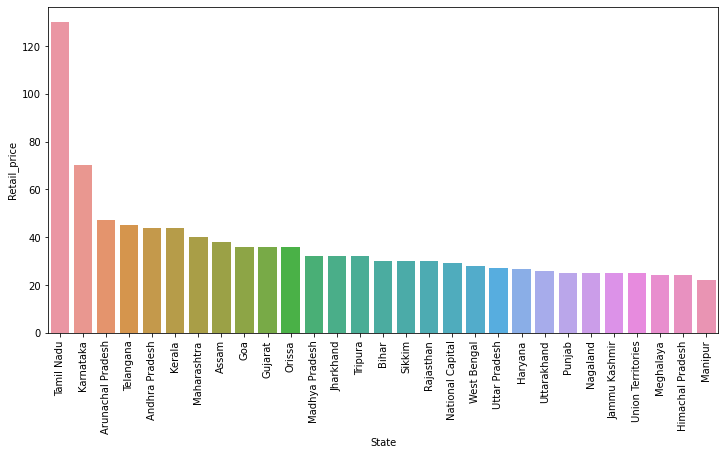

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'State', y = 'Retail_price', data=s)
# Allows you to rotate the X values to 90 degree.
plt.xticks(rotation=90)
plt.show()

### If the Commodity is mustard oil, how many varieties are available in mustard oil

In [30]:
df2=df.loc[df['Commodity'] == 'Mustard Oil', 'Variety'].iloc[0]
print(df2)

nan


### How many varieties are available in each commodity?

In [31]:
pd.crosstab(df_cl["Commodity"],df_cl["Variety"],margins=True).style.background_gradient(cmap="YlOrBr")

Variety,Amul/Any Other,Brooke Bond Red Label,Cat Fish,Common,Common/Coarse,Cow/Buffalo,Ctc(loose),Dairy,Delicious medium size,Desi,Dry,FAQ,Fine,Fresh,Glucose,Instant,Kalyan HYV,Local,Loose(common),Mutton,Packet(iodized),Pomphret,Poultry,Powdered,Powdered Agmark,Rohu 1Kg Size,Split,Superfine,White,Whole,All
Commodity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apple,0,0,0,0,0,0,0,0,9712,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9712
Arhar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11922,0,0,0,11922
Atta,0,0,0,0,0,0,0,0,0,0,0,11454,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11454
Bajra,0,0,0,0,0,0,0,0,0,0,0,7620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7620
Banana,0,0,0,0,0,0,0,0,0,0,0,11407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11407
Biscuit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10703,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10703
Black Pepper,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11242,11242
Bread,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10682,0,0,0,0,0,0,0,0,0,0,0,0,10682
Brinjal,0,0,0,0,0,0,0,0,0,0,0,11400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11400


In [32]:
variety = df_cl.groupby('Commodity').Variety.unique()
variety

Commodity
Apple                       [Delicious medium size]
Arhar                                       [Split]
Atta                                          [FAQ]
Bajra                                         [FAQ]
Banana                                        [FAQ]
Biscuit                                   [Glucose]
Black Pepper                                [Whole]
Bread                                       [Local]
Brinjal                                       [FAQ]
Butter                             [Amul/Any Other]
Chicken                                   [Poultry]
Coconut                                [Dry, Fresh]
Coffee                          [Powdered, Instant]
Coriander                         [Powdered Agmark]
Cummin Seed                                [Common]
Fish            [Rohu 1Kg Size, Cat Fish, Pomphret]
Ghee                                         [Desi]
Gram                                 [Split, Whole]
Gur                                         [Local]
Jo

### What is the Pomphret price in kerala from 2001 to 2021?

In [33]:
df_cl

,Unnamed: 0,State,Centre,Commodity,Variety,Date,Retail_price
0,0,Andhra Pradesh,Chittoor,Moong,Split,Jan-2001,24.0
1,1,Andhra Pradesh,Guntur,Moong,Split,Jan-2001,26.0
2,2,Andhra Pradesh,Kurnool,Moong,Split,Jan-2001,25.5
3,10,Bihar,Hajipur,Moong,Split,Jan-2001,28.0
4,12,Bihar,Patna,Moong,Split,Jan-2001,27.0
...,...,...,...,...,...,...,...
467867,1147436,West Bengal,Asansol,Wheat,Desi,Mar-2021,21.0
467868,1147437,West Bengal,Asansol,Wheat,Kalyan HYV,Mar-2021,22.0
467869,1147438,West Bengal,Howrah,Wheat,Desi,Mar-2021,25.0
467870,1147439,West Bengal,Howrah,Wheat,Kalyan HYV,Mar-2021,27.0


In [34]:
df_cl['Date']= df_cl['Date'].astype('datetime64[ns]')
df_cl['Year'] = df_cl['Date'].dt.year
df_cl

,Unnamed: 0,State,Centre,Commodity,Variety,Date,Retail_price,Year
0,0,Andhra Pradesh,Chittoor,Moong,Split,2001-01-01,24.0,2001
1,1,Andhra Pradesh,Guntur,Moong,Split,2001-01-01,26.0,2001
2,2,Andhra Pradesh,Kurnool,Moong,Split,2001-01-01,25.5,2001
3,10,Bihar,Hajipur,Moong,Split,2001-01-01,28.0,2001
4,12,Bihar,Patna,Moong,Split,2001-01-01,27.0,2001
...,...,...,...,...,...,...,...,...
467867,1147436,West Bengal,Asansol,Wheat,Desi,2021-03-01,21.0,2021
467868,1147437,West Bengal,Asansol,Wheat,Kalyan HYV,2021-03-01,22.0,2021
467869,1147438,West Bengal,Howrah,Wheat,Desi,2021-03-01,25.0,2021
467870,1147439,West Bengal,Howrah,Wheat,Kalyan HYV,2021-03-01,27.0,2021


In [35]:
Pomphret_Price= df_cl[(df_cl['Year']<= 2021) & (df_cl['State']=='Kerala') & (df_cl['Variety']=='Pomphret')]
Pomphret_Price

,Unnamed: 0,State,Centre,Commodity,Variety,Date,Retail_price,Year
264506,645977,Kerala,Khozhikode,Fish,Pomphret,2002-12-01,20.0,2002
264509,645980,Kerala,Trivandrum,Fish,Pomphret,2002-12-01,70.0,2002
264751,646777,Kerala,Ernakulam,Fish,Pomphret,2003-01-01,120.0,2003
264753,646780,Kerala,Khozhikode,Fish,Pomphret,2003-01-01,30.0,2003
264756,646783,Kerala,Trivandrum,Fish,Pomphret,2003-01-01,89.0,2003
...,...,...,...,...,...,...,...,...
331582,820231,Kerala,Trivandrum,Fish,Pomphret,2021-01-01,680.0,2021
331981,821031,Kerala,Khozhikode,Fish,Pomphret,2021-02-01,500.0,2021
331983,821034,Kerala,Trivandrum,Fish,Pomphret,2021-02-01,650.0,2021
332382,821834,Kerala,Khozhikode,Fish,Pomphret,2021-03-01,500.0,2021


In [36]:
Pomphret_Price = Pomphret_Price[['Year','Variety','Retail_price']]
Pomphret_Price

,Year,Variety,Retail_price
264506,2002,Pomphret,20.0
264509,2002,Pomphret,70.0
264751,2003,Pomphret,120.0
264753,2003,Pomphret,30.0
264756,2003,Pomphret,89.0
...,...,...,...
331582,2021,Pomphret,680.0
331981,2021,Pomphret,500.0
331983,2021,Pomphret,650.0
332382,2021,Pomphret,500.0


In [37]:
piv= Pomphret_Price.pivot_table(index='Year',columns='Variety')
piv

,Retail_price
Variety,Pomphret
Year,
2002,45.000000
2003,68.000000
2004,76.666667
2005,92.656250
2006,115.000000
2007,143.181818
2008,212.352941
2009,242.916667


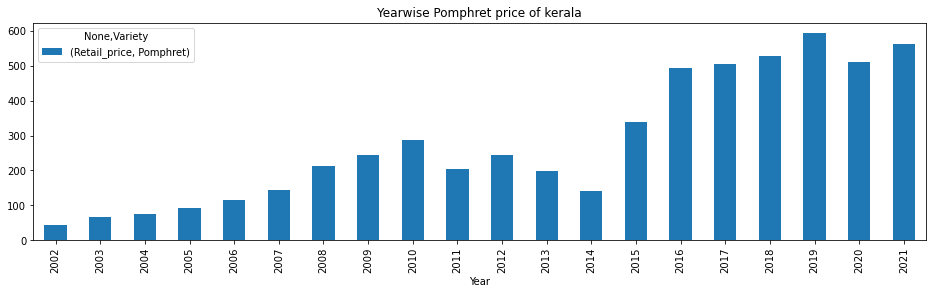

In [38]:
piv.plot(kind="bar",figsize=(16,4))
plt.title("Yearwise Pomphret price of kerala")
plt.show()

In [ ]:
# Kerala_state = df_cl.loc[(df_cl['State'] == 'Kerala')]
# Kerala_state
# total_price = Kerala_state['Retail_price'].sum()
# print (total_price)

### How many states has meat as commodity?

In [39]:
com_meat=df_cl.loc[(df_cl['Commodity'] == 'Meat')]
com_meat

,Unnamed: 0,State,Centre,Commodity,Variety,Date,Retail_price,Year
187018,446396,Andhra Pradesh,Chittoor,Meat,Mutton,2001-01-01,120.0,2001
187019,446398,Andhra Pradesh,Kurnool,Meat,Mutton,2001-01-01,110.0,2001
187020,446406,Bihar,Hajipur,Meat,Mutton,2001-01-01,110.0,2001
187021,446407,Bihar,Muzaffarpur,Meat,Mutton,2001-01-01,120.0,2001
187022,446408,Bihar,Patna,Meat,Mutton,2001-01-01,110.0,2001
...,...,...,...,...,...,...,...,...
259433,627004,Uttar Pradesh,Lucknow,Meat,Mutton,2021-03-01,600.0,2021
259434,627005,Uttar Pradesh,Saharanpur,Meat,Mutton,2021-03-01,600.0,2021
259435,627008,West Bengal,Asansol,Meat,Mutton,2021-03-01,650.0,2021
259436,627009,West Bengal,Howrah,Meat,Mutton,2021-03-01,680.0,2021


In [40]:
pd.crosstab(com_meat["Commodity"],com_meat["State"],margins=True).style.background_gradient(cmap="YlOrBr")

State,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,National Capital,Orissa,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Union Territories,Uttar Pradesh,Uttarakhand,West Bengal,All
Commodity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Meat,758,73,427,362,197,332,297,267,255,393,374,700,522,498,149,228,223,139,241,432,393,870,27,930,218,226,231,1117,55,625,11559
All,758,73,427,362,197,332,297,267,255,393,374,700,522,498,149,228,223,139,241,432,393,870,27,930,218,226,231,1117,55,625,11559


### How many types of variety of meat?

In [41]:
com_meat

,Unnamed: 0,State,Centre,Commodity,Variety,Date,Retail_price,Year
187018,446396,Andhra Pradesh,Chittoor,Meat,Mutton,2001-01-01,120.0,2001
187019,446398,Andhra Pradesh,Kurnool,Meat,Mutton,2001-01-01,110.0,2001
187020,446406,Bihar,Hajipur,Meat,Mutton,2001-01-01,110.0,2001
187021,446407,Bihar,Muzaffarpur,Meat,Mutton,2001-01-01,120.0,2001
187022,446408,Bihar,Patna,Meat,Mutton,2001-01-01,110.0,2001
...,...,...,...,...,...,...,...,...
259433,627004,Uttar Pradesh,Lucknow,Meat,Mutton,2021-03-01,600.0,2021
259434,627005,Uttar Pradesh,Saharanpur,Meat,Mutton,2021-03-01,600.0,2021
259435,627008,West Bengal,Asansol,Meat,Mutton,2021-03-01,650.0,2021
259436,627009,West Bengal,Howrah,Meat,Mutton,2021-03-01,680.0,2021


In [42]:
pd.crosstab(com_meat["Commodity"],df_cl["Variety"],margins=True).style.background_gradient(cmap="YlOrBr")

Variety,Mutton,All
Commodity,,
Meat,11559,11559
All,11559,11559


### Which Centre has the highest price of rice in Maharashtra?

In [43]:
Maha_state = df_cl.loc[(df_cl['State'] == 'Maharashtra')]
Maha_state

,Unnamed: 0,State,Centre,Commodity,Variety,Date,Retail_price,Year
17,42,Maharashtra,Nasik,Moong,Split,2001-01-01,28.0,2001
114,371,Maharashtra,Nasik,Ragi,FAQ,2001-01-01,10.0,2001
139,447,Maharashtra,Nasik,Red Chillies,Powdered Agmark,2001-01-01,10.0,2001
208,616,Maharashtra,Nasik,Rice,Common/Coarse,2001-01-01,12.0,2001
209,617,Maharashtra,Nasik,Rice,Fine,2001-01-01,16.0,2001
...,...,...,...,...,...,...,...,...
467825,1147363,Maharashtra,Nagpur,Wheat,Desi,2021-03-01,29.0,2021
467826,1147364,Maharashtra,Nagpur,Wheat,Kalyan HYV,2021-03-01,25.0,2021
467827,1147366,Maharashtra,Nasik,Wheat,Kalyan HYV,2021-03-01,30.0,2021
467828,1147367,Maharashtra,Pune,Wheat,Desi,2021-03-01,25.0,2021


In [44]:
com_rice=Maha_state.loc[(Maha_state['Commodity'] == 'Rice')]
com_rice

,Unnamed: 0,State,Centre,Commodity,Variety,Date,Retail_price,Year
208,616,Maharashtra,Nasik,Rice,Common/Coarse,2001-01-01,12.0,2001
209,617,Maharashtra,Nasik,Rice,Fine,2001-01-01,16.0,2001
525,1865,Maharashtra,Mumbai,Rice,Common/Coarse,2001-02-01,12.0,2001
526,1866,Maharashtra,Mumbai,Rice,Fine,2001-02-01,13.5,2001
527,1871,Maharashtra,Nasik,Rice,Common/Coarse,2001-02-01,12.0,2001
...,...,...,...,...,...,...,...,...
123762,304327,Maharashtra,Nasik,Rice,Fine,2021-03-01,47.0,2021
123763,304328,Maharashtra,Nasik,Rice,Superfine,2021-03-01,53.0,2021
123764,304329,Maharashtra,Pune,Rice,Common/Coarse,2021-03-01,35.0,2021
123765,304330,Maharashtra,Pune,Rice,Fine,2021-03-01,44.0,2021


In [45]:
max_price=com_rice.loc[com_rice['Retail_price'].idxmax()]
max_price

Unnamed: 0                   257884
State                   Maharashtra
Centre                   Aurangabad
Commodity                      Rice
Variety                   Superfine
Date            2018-02-01 00:00:00
Retail_price                  122.0
Year                           2018
Name: 97985, dtype: object

### What is the price difference between desi wheat and kalyan HYV state wise?

In [46]:
Com_Wheat = df_cl[(df_cl['Commodity'] == 'Wheat')]
Com_Wheat

,Unnamed: 0,State,Centre,Commodity,Variety,Date,Retail_price,Year
416499,1024830,Andhra Pradesh,Chittoor,Wheat,Desi,2001-01-01,13.0,2001
416500,1024831,Andhra Pradesh,Chittoor,Wheat,Kalyan HYV,2001-01-01,10.0,2001
416501,1024832,Andhra Pradesh,Guntur,Wheat,Desi,2001-01-01,11.5,2001
416502,1024835,Andhra Pradesh,Kurnool,Wheat,Kalyan HYV,2001-01-01,11.0,2001
416503,1024851,Bihar,Hajipur,Wheat,Kalyan HYV,2001-01-01,7.0,2001
...,...,...,...,...,...,...,...,...
467867,1147436,West Bengal,Asansol,Wheat,Desi,2021-03-01,21.0,2021
467868,1147437,West Bengal,Asansol,Wheat,Kalyan HYV,2021-03-01,22.0,2021
467869,1147438,West Bengal,Howrah,Wheat,Desi,2021-03-01,25.0,2021
467870,1147439,West Bengal,Howrah,Wheat,Kalyan HYV,2021-03-01,27.0,2021


In [47]:
Com_Wheat = Com_Wheat[['State','Variety','Retail_price']]
Com_Wheat

,State,Variety,Retail_price
416499,Andhra Pradesh,Desi,13.0
416500,Andhra Pradesh,Kalyan HYV,10.0
416501,Andhra Pradesh,Desi,11.5
416502,Andhra Pradesh,Kalyan HYV,11.0
416503,Bihar,Kalyan HYV,7.0
...,...,...,...
467867,West Bengal,Desi,21.0
467868,West Bengal,Kalyan HYV,22.0
467869,West Bengal,Desi,25.0
467870,West Bengal,Kalyan HYV,27.0


In [48]:
df5= Com_Wheat.pivot_table(index='State',columns='Variety')

df5

Retail_price           
Variety                   Desi Kalyan HYV
State                                    
Andhra Pradesh       24.487425  23.621450
Arunachal Pradesh    33.666667  46.333333
Assam                21.539568  25.018182
Bihar                18.738287  15.570423
Goa                  21.417949  20.303318
Gujarat              18.229369  18.651875
Haryana              22.319048  12.473273
Himachal Pradesh      9.386364   9.395522
Jammu Kashmir        19.294118  15.577128
Jharkhand            18.192600  16.568926
Karnataka            23.785813  23.225893
Kerala               22.505747  19.502234
Madhya Pradesh       18.702381  16.408594
Maharashtra          23.931695  22.156679
Manipur                    NaN  22.000000
Meghalaya                  NaN  17.220000
Nagaland             22.800000   9.700000
National Capital     11.331818  15.539583
Orissa               21.796394  16.031757
Punjab                9.088235  11.890689
Rajasthan            18.886104  16.200697
Sikkim               21.421053  23.071429
Tamil Nadu           30.361900  28.176370
Telangana            21.942623  23.276190
Tripura              31.500000  27.000000
Union Territories    10.018493  10.391429
Uttar Pradesh        15.673052  14.992091
Uttarakhand          21.058824  11.168333
West Bengal          18.635533  15.108696

In [49]:
df5.to_csv("kalyan.csv")

In [52]:
df_kal = pd.read_csv("kalyan.csv")
df_kal

# df_kal = df_kal.rename(columns = {'Unnamed: 0': 'State'}, inplace = False)
df_kal = df_kal.rename(columns = {'Retail_price': 'Desi'}, inplace = False)
df_kal = df_kal.rename(columns = {'Retail_price.1': 'Kalyan HYV'}, inplace = False)
df_kal

,State,Desi,Kalyan HYV
0,Andhra Pradesh,24.487425,23.621450
1,Arunachal Pradesh,33.666667,46.333333
2,Assam,21.539568,25.018182
3,Bihar,18.738287,15.570423
4,Goa,21.417949,20.303318
5,Gujarat,18.229369,18.651875
6,Haryana,22.319048,12.473273
7,Himachal Pradesh,9.386364,9.395522
8,Jammu Kashmir,19.294118,15.577128
9,Jharkhand,18.192600,16.568926


In [ ]:
# df_kal.to_csv("kalyanupdated.csv")
# df_kal_up = pd.read_csv("kalyanupdated.csv")
# df_kal_up


In [53]:
df_kal['Price_diff'] = df_kal['Desi'].sub(df_kal['Kalyan HYV'], axis = 0)
print(df_kal)

                State       Desi  Kalyan HYV  Price_diff
0      Andhra Pradesh  24.487425   23.621450    0.865975
1   Arunachal Pradesh  33.666667   46.333333  -12.666667
2               Assam  21.539568   25.018182   -3.478613
3               Bihar  18.738287   15.570423    3.167864
4                 Goa  21.417949   20.303318    1.114631
5             Gujarat  18.229369   18.651875   -0.422506
6             Haryana  22.319048   12.473273    9.845774
7    Himachal Pradesh   9.386364    9.395522   -0.009159
8       Jammu Kashmir  19.294118   15.577128    3.716990
9           Jharkhand  18.192600   16.568926    1.623674
10          Karnataka  23.785813   23.225893    0.559920
11             Kerala  22.505747   19.502234    3.003513
12     Madhya Pradesh  18.702381   16.408594    2.293787
13        Maharashtra  23.931695   22.156679    1.775016
14            Manipur        NaN   22.000000         NaN
15          Meghalaya        NaN   17.220000         NaN
16           Nagaland  22.80000

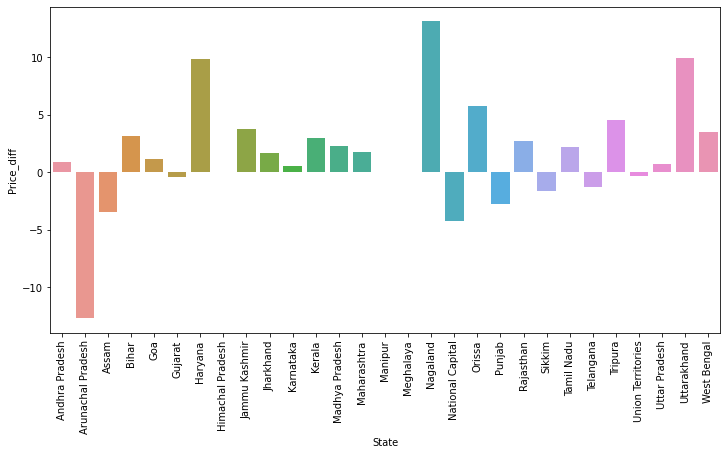

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'State', y = 'Price_diff', data=df_kal)
# Allows you to rotate the X values to 90 degree.
plt.xticks(rotation=90)
plt.show()

### Price range in year wise

In [55]:
Yearwise_Price=df_cl.groupby('Year')['Retail_price'].agg(["min","max"]) 
Yearwise_Price

,min,max
Year,,
2001,1.25,1300.0
2002,1.75,540.0
2003,1.60,902.0
2004,2.00,1100.0
2005,0.50,1100.0
2006,1.00,4120.0
2007,2.00,1500.0
2008,2.00,1700.0
2009,1.00,1850.0


In [56]:
YearCommoditywise_Price=df_cl.groupby(['Year','Commodity'])['Retail_price'].agg(["min","max"]) 
YearCommoditywise_Price

min    max
Year Commodity             
2001 Arhar      19.0   38.0
     Atta        6.0   21.0
     Bajra       3.5   14.0
     Banana      4.0   24.0
     Biscuit     2.0   11.0
...              ...    ...
2021 Tea        60.0  532.0
     Tomato      9.0   80.0
     Turmeric   15.0   35.0
     Urad       75.0  152.5
     Wheat      19.5  130.0

[754 rows x 2 columns]

### How many varieties of coffee is available and what is their price differences (Year Wise)?

In [57]:
Coffee = df_cl[df_cl['Commodity'] == 'Coffee']
Coffee

,Unnamed: 0,State,Centre,Commodity,Variety,Date,Retail_price,Year
332847,822991,Andhra Pradesh,Chittoor,Coffee,Powdered,2001-01-01,140.0,2001
332848,822995,Andhra Pradesh,Kurnool,Coffee,Powdered,2001-01-01,120.0,2001
332849,823015,Goa,Panaji,Coffee,Powdered,2001-01-01,150.0,2001
332850,823043,Kerala,Ernakulam,Coffee,Powdered,2001-01-01,145.0,2001
332851,823047,Kerala,Trivandrum,Coffee,Powdered,2001-01-01,180.0,2001
...,...,...,...,...,...,...,...,...
416385,1024473,Uttar Pradesh,Saharanpur,Coffee,Powdered,2021-03-01,1950.0,2021
416386,1024478,West Bengal,Asansol,Coffee,Instant,2021-03-01,140.0,2021
416387,1024480,West Bengal,Howrah,Coffee,Instant,2021-03-01,1000.0,2021
416388,1024484,West Bengal,Kolkata,Coffee,Instant,2021-03-01,135.0,2021


In [58]:
Coffee.Variety.unique()

array(['Powdered', 'Instant'], dtype=object)

In [59]:
Coffee_PriceDiff = Coffee.groupby('Year')['Retail_price'].agg(["min","max"])
Coffee_PriceDiff

,min,max
Year,,
2001,43.5,190.0
2002,42.0,540.0
2003,95.0,195.0
2004,15.0,1100.0
2005,14.0,1100.0
2006,9.0,1100.0
2007,17.0,1500.0
2008,18.0,1700.0
2009,20.0,1850.0


### What are the varieties of fish available in the market from 2001 to 2010?

In [60]:
com_fish = df_cl.loc[(df_cl['Commodity'] == 'Fish')]
com_fish


,Unnamed: 0,State,Centre,Commodity,Variety,Date,Retail_price,Year
259645,627438,Andhra Pradesh,Chittoor,Fish,Rohu 1Kg Size,2001-01-01,50.0,2001
259646,627444,Andhra Pradesh,Kurnool,Fish,Rohu 1Kg Size,2001-01-01,35.0,2001
259647,627464,Bihar,Hajipur,Fish,Rohu 1Kg Size,2001-01-01,45.0,2001
259648,627466,Bihar,Muzaffarpur,Fish,Rohu 1Kg Size,2001-01-01,56.0,2001
259649,627469,Bihar,Patna,Fish,Rohu 1Kg Size,2001-01-01,45.0,2001
...,...,...,...,...,...,...,...,...
332448,821964,West Bengal,Howrah,Fish,Rohu 1Kg Size,2021-03-01,200.0,2021
332449,821968,West Bengal,Kolkata,Fish,Cat Fish,2021-03-01,900.0,2021
332450,821969,West Bengal,Kolkata,Fish,Pomphret,2021-03-01,500.0,2021
332451,821970,West Bengal,Kolkata,Fish,Rohu 1Kg Size,2021-03-01,155.0,2021


In [61]:
df7= pd.crosstab(com_fish["Commodity"],com_fish["Variety"],margins=True).style.background_gradient(cmap="YlOrBr")
df7

Variety,Cat Fish,Pomphret,Rohu 1Kg Size,All
Commodity,,,,
Fish,3082,4587,9798,17467
All,3082,4587,9798,17467


### Which state has lowest price of Bajra according to year wise?

In [62]:
bajra = df_cl.loc[(df_cl['Commodity'] == 'Bajra')]
bajra

,Unnamed: 0,State,Centre,Commodity,Variety,Date,Retail_price,Year
124150,305220,Andhra Pradesh,Chittoor,Bajra,FAQ,2001-01-01,6.5,2001
124151,305222,Andhra Pradesh,Kurnool,Bajra,FAQ,2001-01-01,5.0,2001
124152,305227,Goa,Panaji,Bajra,FAQ,2001-01-01,9.0,2001
124153,305228,Gujarat,Gandhi Nagar,Bajra,FAQ,2001-01-01,7.5,2001
124154,305231,Gujarat,Vadodra,Bajra,FAQ,2001-01-01,7.0,2001
...,...,...,...,...,...,...,...,...
186765,445639,Uttar Pradesh,Agra,Bajra,FAQ,2021-03-01,17.0,2021
186766,445640,Uttar Pradesh,Allahabad,Bajra,FAQ,2021-03-01,17.0,2021
186767,445642,Uttar Pradesh,Kanpur,Bajra,FAQ,2021-03-01,18.0,2021
186768,445643,Uttar Pradesh,Lucknow,Bajra,FAQ,2021-03-01,18.0,2021


In [63]:
bajra = bajra[['State','Year','Retail_price']]
bajra

,State,Year,Retail_price
124150,Andhra Pradesh,2001,6.5
124151,Andhra Pradesh,2001,5.0
124152,Goa,2001,9.0
124153,Gujarat,2001,7.5
124154,Gujarat,2001,7.0
...,...,...,...
186765,Uttar Pradesh,2021,17.0
186766,Uttar Pradesh,2021,17.0
186767,Uttar Pradesh,2021,18.0
186768,Uttar Pradesh,2021,18.0


In [64]:
min_price=bajra.loc[bajra['Retail_price'].idxmin()]
min_price

State           Uttar Pradesh
Year                     2001
Retail_price              3.5
Name: 125335, dtype: object

In [65]:
bajra.pivot_table(index='State',columns='Year',aggfunc='min')

Retail_price                                              \
Year                      2001   2002 2003  2004   2005  2006   2007  2008   
State                                                                        
Andhra Pradesh            5.00   6.00  7.0   6.0   7.00   7.0   9.00   9.5   
Assam                      NaN  11.00  NaN   NaN    NaN   NaN    NaN   NaN   
Bihar                      NaN    NaN  NaN   NaN    NaN   6.0   7.00   8.0   
Goa                       9.00   8.00  9.0  10.0  10.00  10.0  12.00  12.0   
Gujarat                   5.50   6.50  5.8   6.0   7.00   8.0   9.25   9.0   
Haryana                   5.00   5.00  5.5   5.0   6.50   6.5   7.00   8.0   
Himachal Pradesh           NaN    NaN  NaN   NaN    NaN   NaN    NaN   NaN   
Jammu Kashmir              NaN    NaN  NaN   6.5   6.50   8.5   8.50  10.0   
Jharkhand                  NaN    NaN  NaN   NaN    NaN   NaN    NaN   NaN   
Karnataka                 6.00   6.00  7.0   5.5   5.50   6.0   7.00   7.0   
Kerala                     NaN    NaN  NaN   NaN    NaN  14.0  15.00  15.0   
Madhya Pradesh            7.50   4.00  8.0   7.0   7.50   8.0   8.00   9.0   
Maharashtra               6.50   6.70  6.5   7.0   6.00   8.0  11.00  10.0   
Manipur                    NaN    NaN  NaN   NaN    NaN   NaN    NaN   NaN   
Meghalaya                  NaN    NaN  NaN   NaN    NaN  14.0  14.00  14.0   
Nagaland                   NaN    NaN  NaN   NaN   7.00   NaN    NaN   NaN   
National Capital          6.00   6.00  6.5   6.0   7.00   8.0   9.00   9.0   
Orissa                     NaN    NaN  NaN   NaN    NaN   6.0   7.00   7.0   
Punjab                    5.00   6.00  6.0   7.0   6.00   7.0   8.00   8.0   
Rajasthan                 4.00   4.50  4.5   4.0   5.75   6.0   6.00   6.0   
Sikkim                     NaN    NaN  NaN   NaN    NaN   NaN    NaN   NaN   
Tamil Nadu                5.75   6.25  7.0   7.0   6.50   7.0   9.00   9.0   
Telangana                 8.00   8.00  8.0   8.0   8.00   8.0  10.00   9.0   
Union Territories         6.00    NaN  9.0   9.0   6.50  10.0  10.00  21.0   
Uttar Pradesh             3.50   5.00  6.0   6.0   6.00   6.5   6.50   8.0   
Uttarakhand                NaN    NaN  NaN   NaN    NaN   NaN    NaN   NaN   
West Bengal              10.00    NaN  NaN   NaN    NaN   NaN    NaN   NaN   

                                ...                                        \
Year                2009  2010  ...  2012  2013   2014   2015  2016  2017   
State                           ...                                         
Andhra Pradesh     11.00  12.0  ...  14.0  16.0   16.0  18.00  20.0  20.0   
Assam                NaN   NaN  ...   NaN  25.0   30.0  30.00  30.0   NaN   
Bihar               9.00  10.0  ...   NaN   NaN    NaN    NaN   NaN   NaN   
Goa                14.00  14.0  ...  18.0  20.0   24.0  20.00  24.0  25.0   
Gujarat            11.00  13.5  ...   NaN  14.0   13.0  15.00  19.0  17.0   
Haryana             8.25   9.0  ...  12.0  14.0   14.0  13.00  14.0  15.0   
Himachal Pradesh     NaN   NaN  ...  20.0   NaN    NaN    NaN   NaN   NaN   
Jammu Kashmir      10.00  14.5  ...  15.0  15.0   17.0  17.00  18.0  18.0   
Jharkhand            NaN   NaN  ...   NaN   NaN    NaN  25.00   NaN   NaN   
Karnataka           8.00   9.0  ...  12.0  15.0   14.0  15.00  18.0  16.0   
Kerala             15.00  16.0  ...   NaN  24.0   26.0  26.00  28.0  25.0   
Madhya Pradesh      9.00  12.0  ...  12.0  15.0   18.0  22.00  21.0  21.0   
Maharashtra        13.20  14.8  ...  17.0  22.0   22.0  21.00  24.0  24.0   
Manipur              NaN   NaN  ...  30.0  30.0    NaN    NaN   NaN   NaN   
Meghalaya          14.00   NaN  ...  15.0  36.0  120.0    NaN   NaN   NaN   
Nagaland             NaN   NaN  ...  15.0  30.0    NaN    NaN   NaN   NaN   
National Capital   10.00  11.0  ...  14.0  15.0   15.0  16.00  17.0  18.0   
Orissa              9.00  11.0  ...   NaN   NaN    NaN    NaN   NaN   NaN   
Punjab              9.00  12.0  ...  12.0  12.0   12.0    Na

### How many types of oils are available and their varieties?

In [69]:
df_cl

,Unnamed: 0,State,Centre,Commodity,Variety,Date,Retail_price,Year
0,0,Andhra Pradesh,Chittoor,Moong,Split,2001-01-01,24.0,2001
1,1,Andhra Pradesh,Guntur,Moong,Split,2001-01-01,26.0,2001
2,2,Andhra Pradesh,Kurnool,Moong,Split,2001-01-01,25.5,2001
3,10,Bihar,Hajipur,Moong,Split,2001-01-01,28.0,2001
4,12,Bihar,Patna,Moong,Split,2001-01-01,27.0,2001
...,...,...,...,...,...,...,...,...
467867,1147436,West Bengal,Asansol,Wheat,Desi,2021-03-01,21.0,2021
467868,1147437,West Bengal,Asansol,Wheat,Kalyan HYV,2021-03-01,22.0,2021
467869,1147438,West Bengal,Howrah,Wheat,Desi,2021-03-01,25.0,2021
467870,1147439,West Bengal,Howrah,Wheat,Kalyan HYV,2021-03-01,27.0,2021


In [70]:
df.Commodity.unique()

array(['Moong', nan, 'Mustard Oil', 'Onion', 'Potato', 'Ragi',
       'Red Chillies', 'Rice', 'Salt', 'Sugar', 'Suji', 'Tea', 'Apple',
       'Arhar', 'Atta', 'Bajra', 'Banana', 'Besan', 'Biscuit',
       'Groundnut Oil', 'Gur', 'Jowar', 'Maida', 'Maize', 'Masur', 'Meat',
       'Milk', 'Coriander', 'Cummin Seed', 'Eggs', 'Fish', 'Ghee',
       'Gingelly Oil', 'Gram', 'Black Pepper', 'Bread', 'Brinjal',
       'Butter', 'Chicken', 'Coconut', 'Coconut Oil', 'Coffee', 'Tomato',
       'Turmeric', 'Urad', 'Vanaspati', 'Wheat'], dtype=object)

In [86]:
#Mustard Oil Variety

df1_list = ['Mustard Oil']
Variety_Musterd_Oil= df_cl[df_cl.Commodity.isin(df1_list)]
Variety_Musterd_Oil
Variety_Musterd_Oil.Variety.unique().tolist()


[]

In [87]:
# Groundnut Oil Variety
df1_list = ['Groundnut Oil']
Variety_Groundnut_Oil= df_cl[df_cl.Commodity.isin(df1_list)]
Variety_Groundnut_Oil
Variety_Groundnut_Oil.Variety.unique().tolist()

[]

In [96]:
#Gingelly Oil Variety
df1_list = ['Gingelly Oil']
Variety_Gingelly_Oil= df_cl[df_cl.Commodity.isin(df1_list)]
Variety_Gingelly_Oil
Variety_Gingelly_Oil.Variety.unique().tolist()

[]

In [100]:
#Coconut Oil Variety
df1_list = ['Coconut Oil']
Variety_Coconut_Oil= df_cl[df_cl.Commodity.isin(df1_list)]
Variety_Coconut_Oil
Variety_Coconut_Oil.Variety.unique().tolist()

[]

In [101]:
# Chicken Variety
df1_list = ['Fish']
Variety_Fish= df_cl[df_cl.Commodity.isin(df1_list)]
Variety_Fish
Variety_Fish.Variety.unique().tolist()

['Rohu 1Kg Size', 'Cat Fish', 'Pomphret']

In [102]:
# df8 = [' Oil']
# Variety_Oil= df_cl[df_cl.Commodity.isin(df8)]
# Variety_Oil

### Top 5 Commodities which have high retail price in 2021

In [103]:
Year_2021 = df_cl[df_cl['Year'] == 2021]
Year_2021

,Unnamed: 0,State,Centre,Commodity,Variety,Date,Retail_price,Year
122007,301200,Andhra Pradesh,Chittoor,Moong,Split,2021-01-01,105.0,2021
122008,301201,Andhra Pradesh,Guntur,Moong,Split,2021-01-01,105.0,2021
122009,301202,Andhra Pradesh,Kurnool,Moong,Split,2021-01-01,120.0,2021
122010,301205,Assam,Dibrugarh,Moong,Split,2021-01-01,115.0,2021
122011,301206,Assam,Dispur,Moong,Split,2021-01-01,115.0,2021
...,...,...,...,...,...,...,...,...
467867,1147436,West Bengal,Asansol,Wheat,Desi,2021-03-01,21.0,2021
467868,1147437,West Bengal,Asansol,Wheat,Kalyan HYV,2021-03-01,22.0,2021
467869,1147438,West Bengal,Howrah,Wheat,Desi,2021-03-01,25.0,2021
467870,1147439,West Bengal,Howrah,Wheat,Kalyan HYV,2021-03-01,27.0,2021


In [104]:
Top5_Commodity= Year_2021.groupby('Commodity')['Retail_price'].max().sort_values(ascending= False)
Top5_Commodity [ :5]

Commodity
Coffee          20000.0
Meat             1200.0
Fish             1100.0
Black Pepper     1000.0
Ghee              820.0
Name: Retail_price, dtype: float64

<AxesSubplot:xlabel='Commodity'>

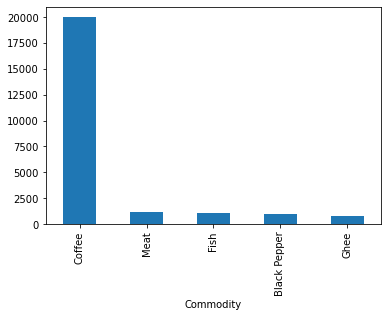

In [105]:
Top5_Commodity[ :5].plot(kind = 'bar')

### Conclusion Of Project

In [115]:
# import pandas_profiling
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df_cl)
# prof
# prof.to_file("Food_Retail_Price_report.html")

In [112]:
import sweetviz as sv

In [113]:
report = sv.analyze(df_cl)

                                             |          | [  0%]   00:00 -> (? left)

In [114]:
report.show_html("Sweetviz_Food_Retail_Price_report.html")

Report Sweetviz_Food_Retail_Price_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
